In [2]:
import numpy as np
import pandas as pd 
import scipy as sp
import matplotlib.pyplot as plt
import scanpy as sc
from anndata import read_h5ad
import anndata
from plotnine import *
from plotnine.data import mtcars 
import glob
import seaborn as sns

%matplotlib inline 
from matplotlib import rcParams, rc_context

from matplotlib import colors

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

2023-02-08 12:15:48.314768: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-08 12:15:48.464055: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-08 12:15:48.951496: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/lsfsuite/lsf/10.1/linux2.6-glibc2.3-x86_64/lib
2023-02-08 12:15:48.951573: W t

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.9.3 pandas==1.5.2 scikit-learn==1.2.0 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8


In [2]:
pwd

'/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/SS2'

In [3]:
gc_file_path = "/mnt/ibm_lg/laura.garcia/glioblastoma/matrix_counts/smartseq2/csv/GBM_SS2_run1.csv"
metadata_file_path = '/mnt/ibm_lg/laura.garcia/glioblastoma/matrix_counts/smartseq2/gbm_metadata.csv'
meta_data = pd.read_csv(metadata_file_path,index_col='Plate ID')

In [4]:
run = pd.read_csv(gc_file_path,index_col='gene') 
run = run.iloc[:-5]

In [5]:
gc = pd.read_csv(gc_file_path,index_col='gene')
gc

,A10_B002046_B001931.gencode.vM19.ERCC,A10_B002047_B001930.gencode.vM19.ERCC,A10_B002048_B001929.gencode.vM19.ERCC,A10_B002049_B001928.gencode.vM19.ERCC,A10_B002050_B001927.gencode.vM19.ERCC,A10_B002051_B001926.gencode.vM19.ERCC,A10_B002052_B001925.gencode.vM19.ERCC,A10_B002053_B001924.gencode.vM19.ERCC,A10_B002054_B001923.gencode.vM19.ERCC,A11_B002046_B001931.gencode.vM19.ERCC,...,P9_B002045_B001932.gencode.vM19.ERCC,P9_B002046_B001931.gencode.vM19.ERCC,P9_B002047_B001930.gencode.vM19.ERCC,P9_B002048_B001929.gencode.vM19.ERCC,P9_B002049_B001928.gencode.vM19.ERCC,P9_B002050_B001927.gencode.vM19.ERCC,P9_B002051_B001926.gencode.vM19.ERCC,P9_B002052_B001925.gencode.vM19.ERCC,P9_B002053_B001924.gencode.vM19.ERCC,P9_B002054_B001923.gencode.vM19.ERCC
gene,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610006L08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009B22Rik,265,150,159,82,7,1,0,521,119,60,...,0,0,0,0,0,0,0,0,0,0
0610009E02Rik,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009L18Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
__no_feature,94200,78306,59806,77264,25932,1330,42,375554,107481,98070,...,40,10,156,278,279,28,70,100062,11,402
__ambiguous,131504,235861,154461,76116,12872,141,2,199780,73080,57687,...,0,0,0,131,0,0,66,1388,49,171
__too_low_aQual,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
gc.to_csv("/mnt/ibm_lg/laura.garcia/glioblastoma/matrix_counts/smartseq2/csv/GBM_SS2_run1_preprocess.csv")

Create Anndata object with metadata

Transpose to match metadata

In [7]:
adata = sc.AnnData(run)
adata = adata.transpose()

adata.obs['Plate ID'] = [i.split('_')[1] for i in adata.obs.index]
adata.obs['well'] = [i.split('_')[0] for i in adata.obs.index]
adata.obs['cell_id'] = [i.split('_')[0] + "_" + i.split('_')[1] for i in adata.obs.index] 

/tmp/ipykernel_38759/3223127611.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


In [8]:
adata.obs

,Plate ID,well,cell_id
A10_B002046_B001931.gencode.vM19.ERCC,B002046,A10,A10_B002046
A10_B002047_B001930.gencode.vM19.ERCC,B002047,A10,A10_B002047
A10_B002048_B001929.gencode.vM19.ERCC,B002048,A10,A10_B002048
A10_B002049_B001928.gencode.vM19.ERCC,B002049,A10,A10_B002049
A10_B002050_B001927.gencode.vM19.ERCC,B002050,A10,A10_B002050
...,...,...,...
P9_B002050_B001927.gencode.vM19.ERCC,B002050,P9,P9_B002050
P9_B002051_B001926.gencode.vM19.ERCC,B002051,P9,P9_B002051
P9_B002052_B001925.gencode.vM19.ERCC,B002052,P9,P9_B002052
P9_B002053_B001924.gencode.vM19.ERCC,B002053,P9,P9_B002053


In [9]:
meta_data

,Library ID,Cell type,mCherry,Passage,Processing,Date Sorted,Library Size,Tapestation nM,qPCR nM,Average nM,Sequencing index,Seq platform,Run link
Plate ID,,,,,,,,,,,,,
B002054,B001923,Adherent,negative,8,Trypsin,9/28/21,606,121,182.38,151.7,i5_1,NovaSeq S4 Full,s3://glioblastoma/SmartSeq2/fastqs/run1/
B002053,B001924,Adherent,negative,9,Trypsin,9/28/21,641,154,298.87,226.4,i5_2,NovaSeq S4 Full,s3://glioblastoma/SmartSeq2/fastqs/run1/
B002052,B001925,Adherent,negative,9,Trypsin,9/28/21,628,287,487.98,387.5,i5_3,NovaSeq S4 Full,s3://glioblastoma/SmartSeq2/fastqs/run1/
B002051,B001926,Adherent,negative,3,Trypsin,9/28/21,632,267,381.77,324.4,i5_4,NovaSeq S4 Full,s3://glioblastoma/SmartSeq2/fastqs/run1/
B002050,B001927,Adherent,negative,3,Trypsin,9/28/21,622,218,238.00,228.0,i5_5,NovaSeq S4 Full,s3://glioblastoma/SmartSeq2/fastqs/run1/
B002049,B001928,Neurospheres,positive,M+8,Accutase,9/28/21,649,299,421.64,360.3,i5_6,NovaSeq S4 Full,s3://glioblastoma/SmartSeq2/fastqs/run1/
B002048,B001929,Neurospheres,positive,M+8,Accutase,9/28/21,642,254,502.01,378.0,i5_7,NovaSeq S4 Full,s3://glioblastoma/SmartSeq2/fastqs/run1/
B002047,B001930,Neurospheres,positive,1+6,Accutase,9/28/21,629,237,541.02,389.0,i5_8,NovaSeq S4 Full,s3://glioblastoma/SmartSeq2/fastqs/run1/
B002046,B001931,Neurospheres,positive,3+6,Accutase,9/28/21,587,153,185.47,169.2,i5_9,NovaSeq S4 Full,s3://glioblastoma/SmartSeq2/fastqs/run1/


In [10]:
myList = list(set(adata.obs['Plate ID']))

try:
    auxdict = dict(meta_data['mCherry'][myList])
    adata.obs['mCherry'] = adata.obs['Plate ID'].map(auxdict)
    auxdict = dict(meta_data['Cell type'][myList])
    adata.obs['sample_type'] = adata.obs['Plate ID'].map(auxdict)
    
            
    print('import complete for run')

    
except KeyError:
    print('sorry, no metadata available for run')

import complete for run


In [11]:
# Creating a new sample column to correct 

adata.obs['sample'] = 'C11'
adata.obs.loc[adata.obs['Plate ID']=='B002046', 'sample'] = 'C12'
adata.obs.loc[adata.obs['Plate ID']=='B002047', 'sample'] = 'C12'
adata.obs.loc[adata.obs['Plate ID']=='B002048', 'sample'] = 'C13'
adata.obs.loc[adata.obs['Plate ID']=='B002049', 'sample'] = 'C13'
adata.obs.loc[adata.obs['Plate ID']=='B002050', 'sample'] = 'S9'
adata.obs.loc[adata.obs['Plate ID']=='B002051', 'sample'] = 'S9'
adata.obs.loc[adata.obs['Plate ID']=='B002052', 'sample'] = 'S10'
adata.obs.loc[adata.obs['Plate ID']=='B002053', 'sample'] = 'S11'
adata.obs.loc[adata.obs['Plate ID']=='B002054', 'sample'] = 'S12'

# Correct sph/adh annotation

adata.obs['sample_type'] = 'AC'
# adata.obs.loc[adata.obs['sample'].isin(['C11','C12','C13']), 'sample_type'] = "AC"
adata.obs.loc[adata.obs['sample'].isin(['S9','S10','S11','S12']), 'sample_type'] = "NS"


# Correct mcherry

adata.obs.loc[adata.obs['sample_type'].isin(['AC']), 'mCherry'] = "pos"
adata.obs.loc[adata.obs['sample_type'].isin(['NS']), 'mCherry'] = "neg"


In [12]:
# add metadata
adata.obs['time'] = 'NA'
adata.obs['treatment'] = 'NA'
adata.obs['technology'] = 'SS2'


In [13]:
# rename samples with technology
adata.obs['sample_r'] = 'Smart-Seq AC-1'
adata.obs.loc[adata.obs['sample']=='C12', 'sample_r'] = 'Smart-Seq AC-2'
adata.obs.loc[adata.obs['sample']=='C13', 'sample_r'] = 'Smart-Seq AC-3'
adata.obs.loc[adata.obs['sample']=='S9', 'sample_r'] = 'Smart-Seq NS-1'
adata.obs.loc[adata.obs['sample']=='S10', 'sample_r'] = 'Smart-Seq NS-2'
adata.obs.loc[adata.obs['sample']=='S11', 'sample_r'] = 'Smart-Seq NS-3'
adata.obs.loc[adata.obs['sample']=='S12', 'sample_r'] = 'Smart-Seq NS-4'


In [14]:
adata.write('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/SS2/data/SS2_raw.h5ad')

# Filtering

In [15]:
adata = sc.read('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/SS2/data/SS2_raw.h5ad')

In [16]:
adata

AnnData object with n_obs × n_vars = 3483 × 54444
    obs: 'Plate ID', 'well', 'cell_id', 'mCherry', 'sample_type', 'sample', 'time', 'treatment', 'technology', 'sample_r'

In [17]:
adata.obs

,Plate ID,well,cell_id,mCherry,sample_type,sample,time,treatment,technology,sample_r
A10_B002046_B001931.gencode.vM19.ERCC,B002046,A10,A10_B002046,pos,AC,C12,NA,NA,SS2,Smart-Seq AC-2
A10_B002047_B001930.gencode.vM19.ERCC,B002047,A10,A10_B002047,pos,AC,C12,NA,NA,SS2,Smart-Seq AC-2
A10_B002048_B001929.gencode.vM19.ERCC,B002048,A10,A10_B002048,pos,AC,C13,NA,NA,SS2,Smart-Seq AC-3
A10_B002049_B001928.gencode.vM19.ERCC,B002049,A10,A10_B002049,pos,AC,C13,NA,NA,SS2,Smart-Seq AC-3
A10_B002050_B001927.gencode.vM19.ERCC,B002050,A10,A10_B002050,neg,NS,S9,NA,NA,SS2,Smart-Seq NS-1
...,...,...,...,...,...,...,...,...,...,...
P9_B002050_B001927.gencode.vM19.ERCC,B002050,P9,P9_B002050,neg,NS,S9,NA,NA,SS2,Smart-Seq NS-1
P9_B002051_B001926.gencode.vM19.ERCC,B002051,P9,P9_B002051,neg,NS,S9,NA,NA,SS2,Smart-Seq NS-1
P9_B002052_B001925.gencode.vM19.ERCC,B002052,P9,P9_B002052,neg,NS,S10,NA,NA,SS2,Smart-Seq NS-2
P9_B002053_B001924.gencode.vM19.ERCC,B002053,P9,P9_B002053,neg,NS,S11,NA,NA,SS2,Smart-Seq NS-3


In [18]:
adata.var

""
gene
0610005C13Rik
0610006L08Rik
0610009B22Rik
0610009E02Rik
0610009L18Rik
...
n-R5s96
n-R5s97
n-R5s98


In [19]:
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

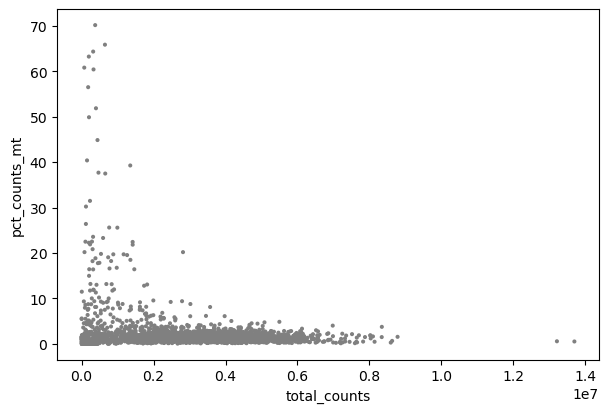

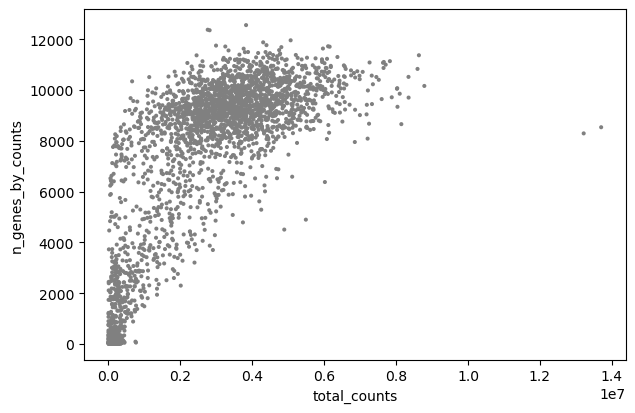

In [20]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [21]:
mito_genes = adata.var_names.str.startswith('mt-')
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

print(sum(mito_genes))

37


In [22]:
ribo_genes = adata.var_names.str.startswith("Rps","Rpl")
print(sum(ribo_genes))

adata.obs['percent_ribo'] = np.sum(
    adata[:, ribo_genes].X, axis=1) / np.sum(adata.X, axis=1)

158


In [23]:
ERCC_genes = adata.var_names.str.startswith('ERCC-')

adata.obs['percent_ERCC'] = np.sum(
    adata[:, ERCC_genes].X, axis=1) / np.sum(adata.X, axis=1)

print(sum(ERCC_genes))

92


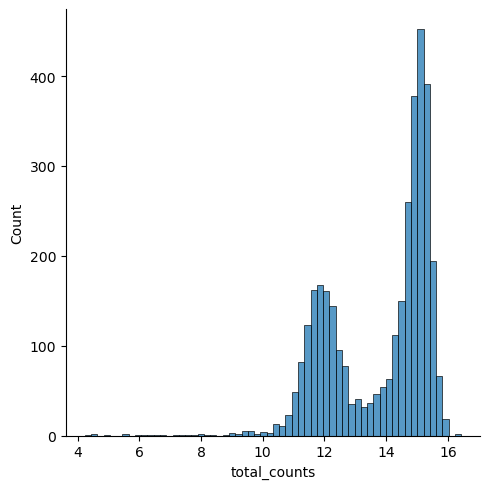

In [24]:
sns.displot(np.log1p(adata.obs['total_counts']), bins=60, discrete=False, kde=False);

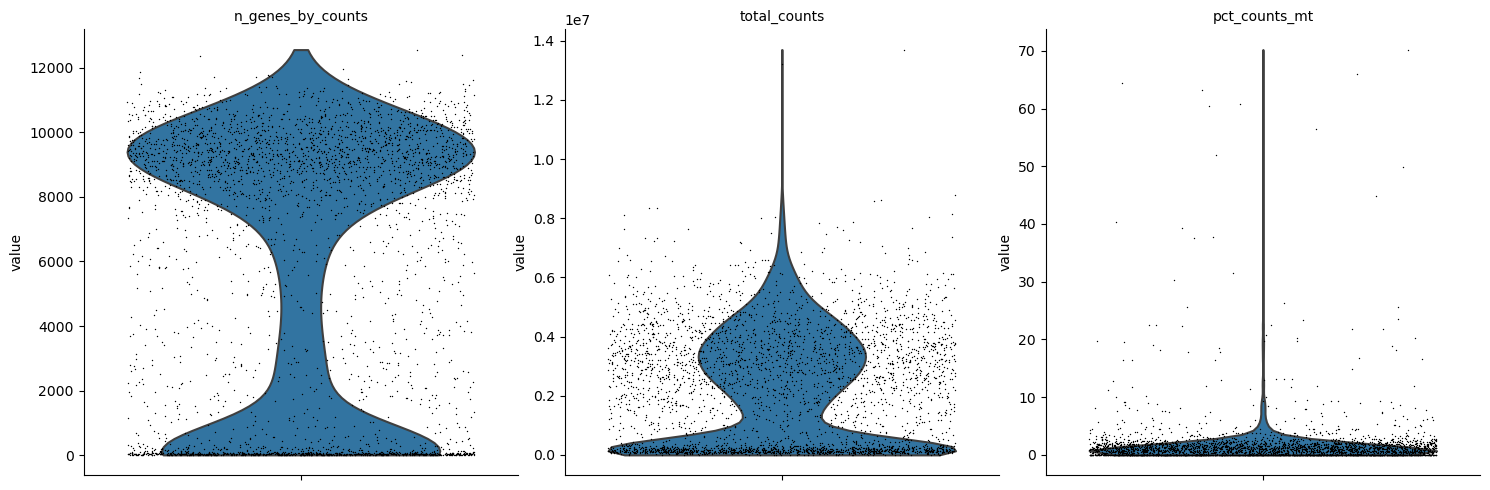

In [25]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

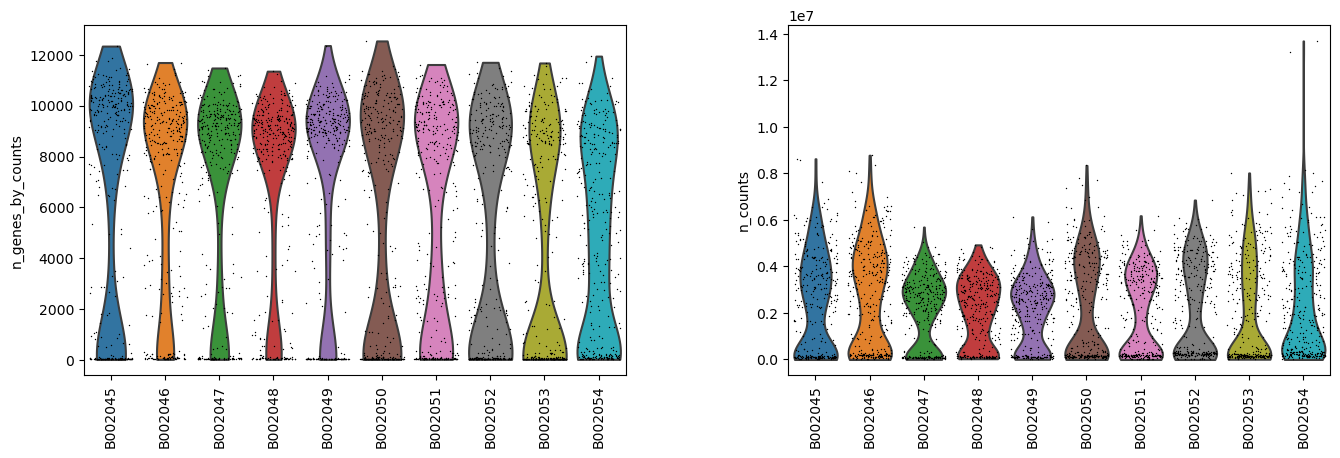

In [26]:
sc.pl.violin(adata, ['n_genes_by_counts','n_counts'],
             jitter=0.4, groupby = 'Plate ID', rotation=90)

KeyError: 'y'

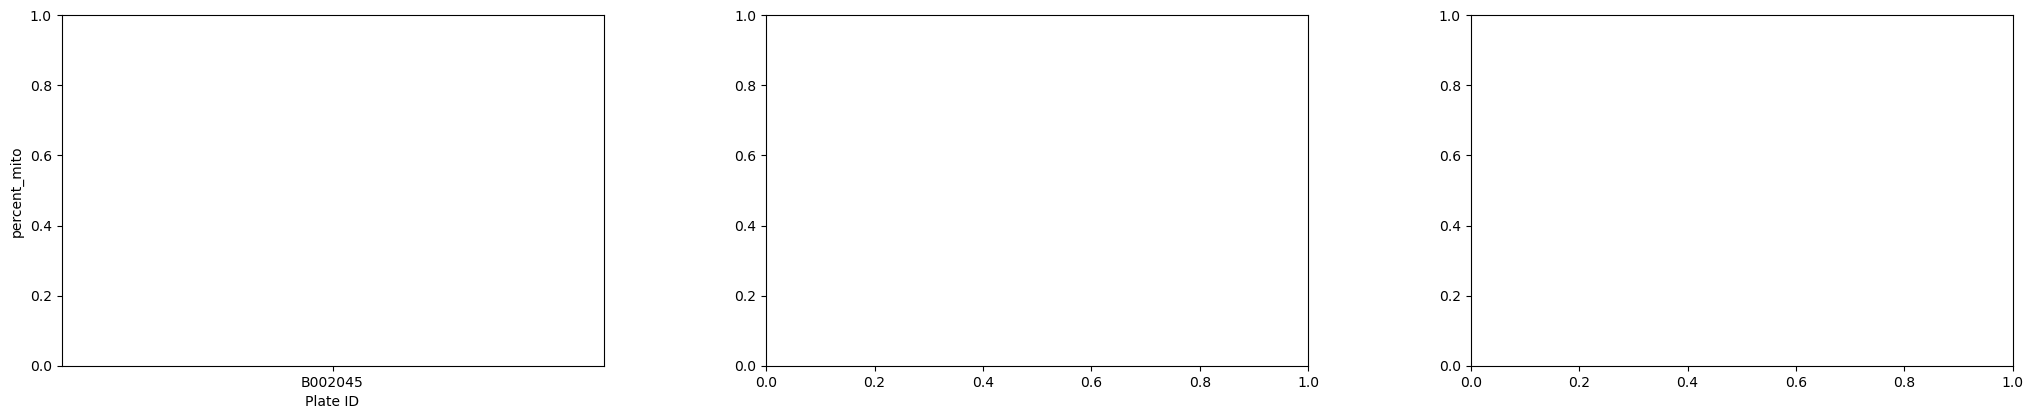

In [27]:
sc.pl.violin(adata, ['percent_mito','percent_ribo', 'percent_ERCC'],
             jitter=0.4, groupby = 'Plate ID', rotation=90)

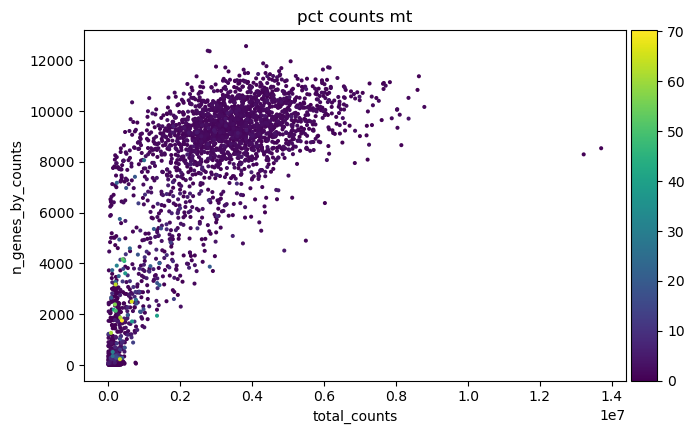

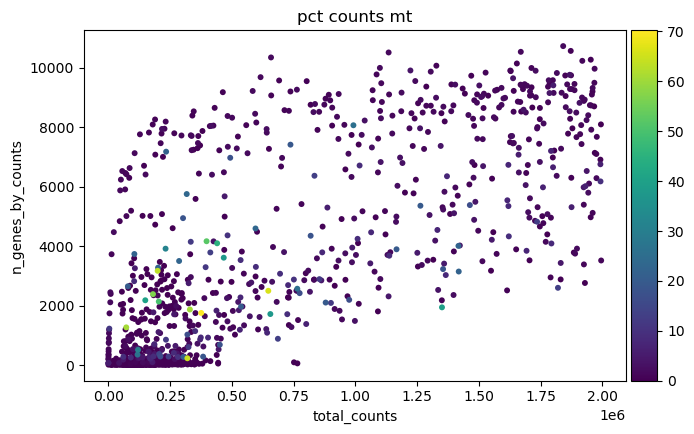

In [28]:
sc.pl.scatter(adata, 'total_counts', 'n_genes_by_counts', color='pct_counts_mt')
sc.pl.scatter(adata[adata.obs['total_counts']<2000000], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt' )

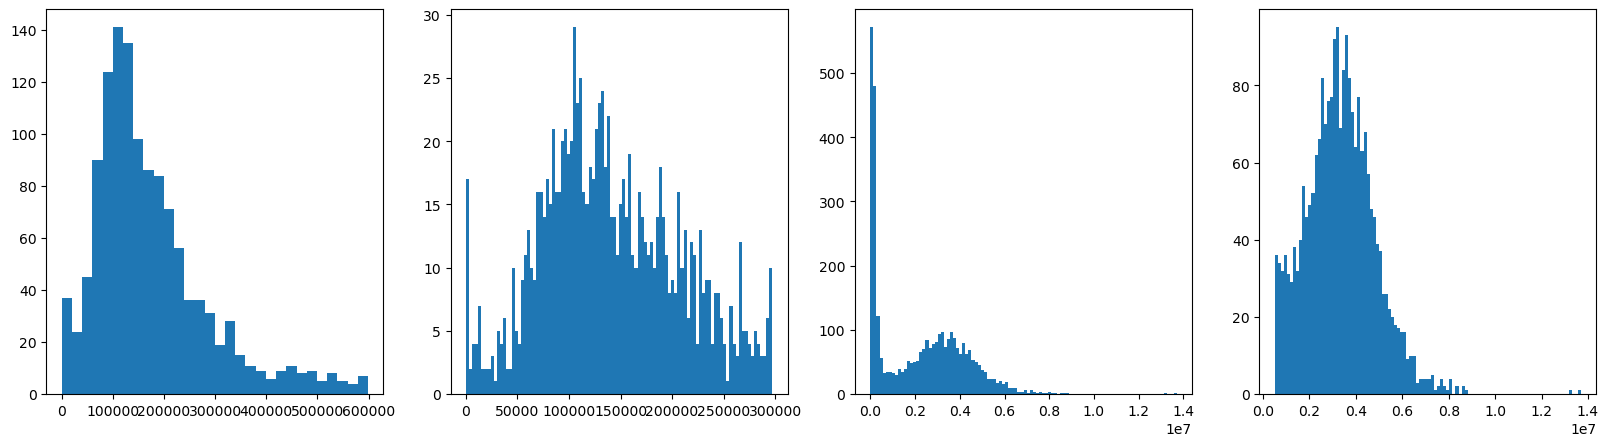

In [29]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(20, 5))

ax1.hist(adata.obs['total_counts'][adata.obs['total_counts']<600000], bins=30)
ax2.hist(adata.obs['total_counts'][adata.obs['total_counts']<300000], bins=100)
ax3.hist(adata.obs['total_counts'][adata.obs['total_counts']>500], bins=100)
ax4.hist(adata.obs['total_counts'][adata.obs['total_counts']>500000], bins=100)

plt.show()

In [30]:
np.median(adata.obs['n_genes_by_counts'])

8154.0

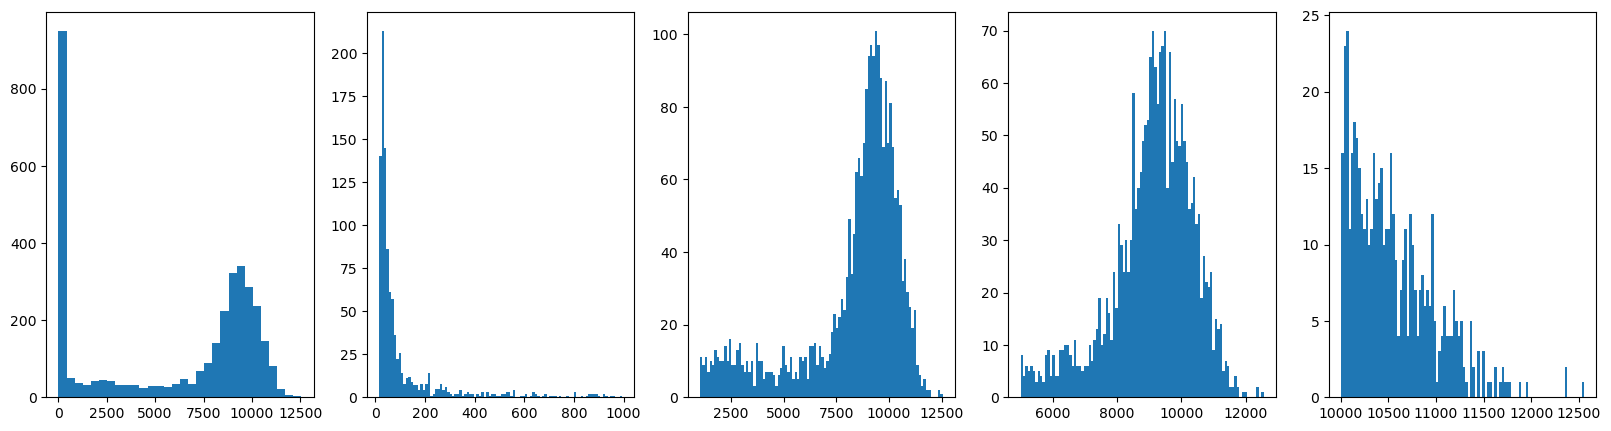

In [31]:
fig, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(1, 5, figsize=(20, 5))

ax1.hist(adata.obs['n_genes_by_counts'], bins=30)
ax2.hist(adata.obs['n_genes_by_counts'][adata.obs['n_genes_by_counts']<1000], bins=100)
ax3.hist(adata.obs['n_genes_by_counts'][adata.obs['n_genes_by_counts']>1000], bins=100)
ax4.hist(adata.obs['n_genes_by_counts'][adata.obs['n_genes_by_counts']>5000], bins=100)
ax5.hist(adata.obs['n_genes_by_counts'][adata.obs['n_genes_by_counts']>10000], bins=100)

plt.show()

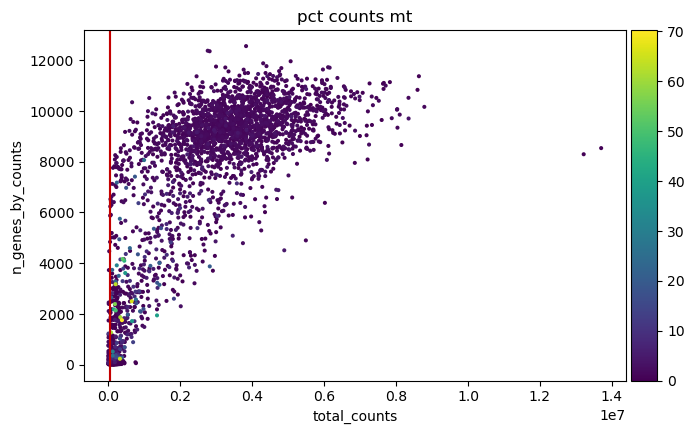

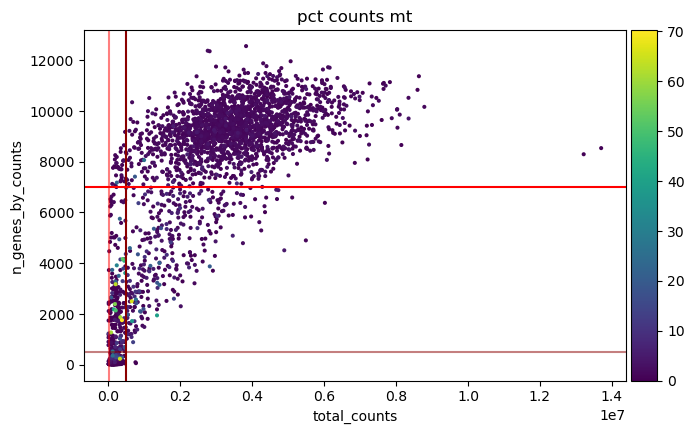

In [32]:
counts_upper = 40000
counts_upper_alt = 30000
counts_lower = 5000
counts_lower_alt = 500000
genes_lower = 7000
genes_lower_alt = 500

p1 = sc.pl.scatter(adata, 'total_counts', 'n_genes_by_counts', color='pct_counts_mt', show=False)
p1.axline((counts_upper,0),(counts_upper,1), color='red')
p1.axline((counts_upper_alt,0),(counts_upper_alt,1), color='darkred', alpha=0.5)

count_lim = 1500
p2 = sc.pl.scatter(adata[adata.obs['total_counts']>count_lim], 'total_counts', 'n_genes_by_counts', color='pct_counts_mt', show=False)
p2.axline((counts_lower,0),(counts_lower,1), color='red', alpha=0.5)
p2.axline((counts_lower_alt,0),(counts_lower_alt,1), color='darkred')
p2.axline((0,genes_lower),(1,genes_lower), color='red')
p2.axline((0,genes_lower_alt),(1,genes_lower_alt), color='darkred', alpha=0.5);

In [33]:
adata_filtered = adata.copy()

In [34]:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata_filtered, min_counts = 5000)
print('Number of cells after min count filter: {:d}'.format(adata_filtered.n_obs))

# sc.pp.filter_cells(adata_filtered, max_counts = 15000)
# print('Number of cells after max count filter: {:d}'.format(adata_filtered.n_obs))

sc.pp.filter_cells(adata_filtered, min_genes = 800)
print('Number of cells after gene filter: {:d}'.format(adata_filtered.n_obs))

Total number of cells: 3483
filtered out 19 cells that have less than 5000 counts
Number of cells after min count filter: 3464
filtered out 983 cells that have less than 800 genes expressed
Number of cells after gene filter: 2481


In [35]:
# remove ERCC genes from dataset
print('Total number of genes: {:d}'.format(adata_filtered.n_vars))

ercc_genes = [name for name in adata_filtered.var_names if name.startswith('ERCC-')]
adata_filtered = adata_filtered[:,~adata_filtered.var_names.isin(ercc_genes)]

print('Number of genes after gene filter: {:d}'.format(adata_filtered.n_vars))

Total number of genes: 54444
Number of genes after gene filter: 54352


In [36]:
adata_filtered.write('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/SS2/data/SS2_cellsfilt.h5ad')

In [37]:
adata_filtered = sc.read('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/SS2/data/SS2_cellsfilt.h5ad')

In [38]:
print('Total number of genes: {:d}'.format(adata_filtered.n_vars))

sc.pp.filter_genes(adata_filtered, min_cells=10)
print('Number of genes after cell filter: {:d}'.format(adata_filtered.n_vars))

Total number of genes: 54352
filtered out 29585 genes that are detected in less than 10 cells
Number of genes after cell filter: 24767


In [39]:
adata

AnnData object with n_obs × n_vars = 3483 × 54444
    obs: 'Plate ID', 'well', 'cell_id', 'mCherry', 'sample_type', 'sample', 'time', 'treatment', 'technology', 'sample_r', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'percent_mito', 'n_counts', 'percent_ribo', 'percent_ERCC'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Plate ID_colors'

In [40]:
adata_filtered

AnnData object with n_obs × n_vars = 2481 × 24767
    obs: 'Plate ID', 'well', 'cell_id', 'mCherry', 'sample_type', 'sample', 'time', 'treatment', 'technology', 'sample_r', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'percent_mito', 'n_counts', 'percent_ribo', 'percent_ERCC', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Plate ID_colors'

normalizing counts per cell
    finished (0:00:00)


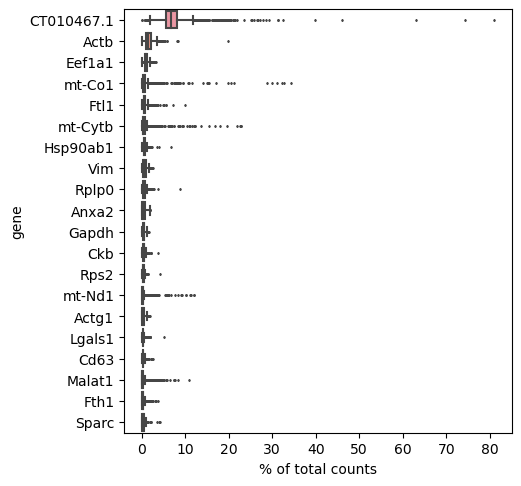

In [41]:
sc.pl.highest_expr_genes(adata_filtered, n_top=20, )

In [42]:
# calculating the fraction of samples after applying filter above
fraction_counting = []
for i in set(adata_filtered.obs['Plate ID']):
    fraction = "%.2f" % float((len(adata_filtered[adata_filtered.obs['Plate ID']==i]))/(len(adata[adata.obs['Plate ID']==i])))
    if len(adata_filtered[adata_filtered.obs['Plate ID']==i]) <= 96:
        fraction_counting.append((i,fraction,str(list(set(adata_filtered[adata_filtered.obs['Plate ID']==i].obs['mCherry']))[0]),'96_well_plate'))
    else:
        fraction_counting.append((i,fraction,str(list(set(adata_filtered[adata_filtered.obs['Plate ID']==i].obs['mCherry']))[0]),'384_well_plate'))
fraction_df = pd.DataFrame(fraction_counting, columns =['Plate ID', 'fraction','mCherry', "plate type"])

In [43]:
fraction_df

,Plate ID,fraction,mCherry,plate type
0,B002046,0.81,pos,384_well_plate
1,B002049,0.78,pos,384_well_plate
2,B002051,0.70,neg,384_well_plate
3,B002048,0.82,pos,384_well_plate
4,B002052,0.64,neg,384_well_plate
5,B002053,0.54,neg,384_well_plate
6,B002054,0.69,neg,384_well_plate
7,B002050,0.66,neg,384_well_plate
8,B002045,0.70,pos,384_well_plate
9,B002047,0.78,pos,384_well_plate


In [44]:
adata_filtered.obs

,Plate ID,well,cell_id,mCherry,sample_type,sample,time,treatment,technology,sample_r,...,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,percent_mito,n_counts,percent_ribo,percent_ERCC,n_genes
A10_B002046_B001931.gencode.vM19.ERCC,B002046,A10,A10_B002046,pos,AC,C12,NA,NA,SS2,Smart-Seq AC-2,...,42.837337,56.597397,42527.0,10.657918,1.769009,NaN,2404001.0,NaN,NaN,8840
A10_B002047_B001930.gencode.vM19.ERCC,B002047,A10,A10_B002047,pos,AC,C12,NA,NA,SS2,Smart-Seq AC-2,...,40.870569,54.340666,38610.0,10.561293,0.922847,NaN,4183793.0,NaN,NaN,10705
A10_B002048_B001929.gencode.vM19.ERCC,B002048,A10,A10_B002048,pos,AC,C13,NA,NA,SS2,Smart-Seq AC-3,...,48.397282,61.831712,32109.0,10.376923,1.028534,NaN,3121822.0,NaN,NaN,10471
A10_B002049_B001928.gencode.vM19.ERCC,B002049,A10,A10_B002049,pos,AC,C13,NA,NA,SS2,Smart-Seq AC-3,...,39.100094,52.817795,23605.0,10.069256,1.084509,NaN,2176560.0,NaN,NaN,9067
A10_B002050_B001927.gencode.vM19.ERCC,B002050,A10,A10_B002050,neg,NS,S9,NA,NA,SS2,Smart-Seq NS-1,...,47.326497,63.729305,600.0,6.398595,0.157527,NaN,380886.0,NaN,NaN,7869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P7_B002048_B001929.gencode.vM19.ERCC,B002048,P7,P7_B002048,pos,AC,C13,NA,NA,SS2,Smart-Seq AC-3,...,41.765718,56.938061,33608.0,10.422549,1.988016,NaN,1690530.0,NaN,NaN,8491
P8_B002046_B001931.gencode.vM19.ERCC,B002046,P8,P8_B002046,pos,AC,C12,NA,NA,SS2,Smart-Seq AC-2,...,39.976363,54.094545,32397.0,10.385852,1.897359,NaN,1707479.0,NaN,NaN,9200
P8_B002051_B001926.gencode.vM19.ERCC,B002051,P8,P8_B002051,neg,NS,S9,NA,NA,SS2,Smart-Seq NS-1,...,54.194377,72.937540,1438.0,7.271704,0.305447,NaN,470785.0,NaN,NaN,4991
P9_B002048_B001929.gencode.vM19.ERCC,B002048,P9,P9_B002048,pos,AC,C13,NA,NA,SS2,Smart-Seq AC-3,...,99.528993,99.786485,10.0,2.397895,0.006374,NaN,156898.0,NaN,NaN,835


In [45]:
# Making all QC plots

### Number of Reads versus Number of Genes
g1_unfiltered = (ggplot(adata.obs, aes(x='n_genes', y='n_counts',color='Plate ID')) + geom_point() + scale_y_log10() + geom_hline(yintercept = 5000) + geom_vline(xintercept = 500) + theme(axis_text_x=element_text(rotation=90, hjust=1)) + labs(title='Number of Reads versus Number of Genes (Unfiltered)', x="Number of Genes",y="Number of Reads"))
g1_filtered = (ggplot(adata_filtered.obs, aes(x='n_genes', y='n_counts',color='Plate ID')) + geom_point() + scale_y_log10() + geom_hline(yintercept = 5000) + geom_vline(xintercept = 500) + theme(axis_text_x=element_text(rotation=90, hjust=1)) + labs(title='Number of Reads versus Number of Genes (Filtered)', x="Number of Genes",y="Number of Reads"))

### Percent ERCCs versus Number of Genes
g2_unfiltered = (ggplot(adata.obs, aes(x='n_genes', y='percent_ERCC',color='Plate ID')) + geom_point() + scale_y_log10() + theme(axis_text_x=element_text(rotation=90, hjust=1)) + labs(title='Percent ERCCs versus Number of Genes (Unfiltered)', x="Number of Genes",y="Percent ERCCs"))
g2_filtered = (ggplot(adata_filtered.obs, aes(x='n_genes', y='percent_ERCC',color='Plate ID')) + geom_point() + scale_y_log10() + theme(axis_text_x=element_text(rotation=90, hjust=1)) + labs(title='Percent ERCCs versus Number of Genes (Filtered)', x="Number of Genes",y="Percent ERCCs"))

### Number of Reads for Each cDNA Plate
g3_unfiltered = ggplot(adata.obs, aes(x = 'Plate ID', y = 'n_counts', fill='Plate ID')) + geom_boxplot() + scale_y_log10() + theme(axis_text_x=element_text(rotation=90, hjust=1)) + labs(title="Number of Reads for Each cDNA Plate (Unfiltered)", x="cDNA plate", y="Number of Reads")
g3_filtered = ggplot(adata_filtered.obs, aes(x = 'Plate ID', y = 'n_counts', fill='Plate ID')) + geom_boxplot() + scale_y_log10() + theme(axis_text_x=element_text(rotation=90, hjust=1)) + labs(title="Number of Reads for Each cDNA Plate (Filtered)", x="cDNA plate", y="Number of Reads")

### Number of Genes for Each cDNA Plate
g4_unfiltered = ggplot(adata.obs, aes(x = 'Plate ID', y = 'n_genes', fill='Plate ID')) + geom_boxplot() + scale_y_log10() + theme(axis_text_x=element_text(rotation=90, hjust=1)) + labs(title="Number of Genes for Each cDNA Plate (Unfiltered)", x="cDNA plate", y="Number of Genes")
g4_filtered = ggplot(adata_filtered.obs, aes(x = 'Plate ID', y = 'n_genes', fill='Plate ID')) + geom_boxplot() + scale_y_log10() + theme(axis_text_x=element_text(rotation=90, hjust=1)) + labs(title="Number of Genes for Each cDNA Plate (Filtered)", x="cDNA plate", y="Number of Genes")

### Percent ERCCs for Each cDNA Plate
g5_unfiltered = ggplot(adata.obs, aes(x = 'Plate ID', y = 'percent_ERCC', fill='Plate ID')) + geom_boxplot() + theme(axis_text_x=element_text(rotation=90, hjust=1)) + labs(title="Percent ERCCs for Each cDNA Plate (Unfiltered)", x="cDNA plate", y="Percent ERCCs")
g5_filtered = ggplot(adata_filtered.obs, aes(x = 'Plate ID', y = 'percent_ERCC', fill='Plate ID')) + geom_boxplot() + theme(axis_text_x=element_text(rotation=90, hjust=1)) + labs(title="Percent ERCCs for Each cDNA Plate (Filtered)", x="cDNA plate", y="Percent ERCCs")

### Number of Cells for Each cDNA Plate
g6_unfiltered = (ggplot(adata.obs, aes('Plate ID', fill='Plate ID')) + geom_bar() + geom_text(aes(label='stat(count)'),stat='count',nudge_y=0.125,va='bottom',size=6) +  theme(axis_text_x=element_text(rotation=90, hjust=1)) + labs(title="Number of Cells for Each cDNA Plate (Unfiltered)", x="cDNA plate"))
g6_filtered = (ggplot(adata_filtered.obs, aes('Plate ID', fill='Plate ID')) + geom_bar() + geom_text(aes(label='stat(count)'),stat='count',nudge_y=0.125,va='bottom',size=6) +  theme(axis_text_x=element_text(rotation=90, hjust=1)) + labs(title="Number of Cells for Each cDNA Plate (Filtered)", x="cDNA plate"))

### Fraction of Cells
g8 = (ggplot(fraction_df, aes(x='mCherry', y='fraction',fill='Plate ID',color='plate type')) + geom_bar(stat="identity",position=position_dodge()) + theme(axis_text_x=element_text(rotation=90, hjust=1)) + labs(title="Fraction of mCherry-labeled Cells Passed QC for Each Plate", x="mCherry"))
#? g9 = (ggplot(fraction_df, aes(x='Cell type', y='fraction',fill='Plate ID',color='plate_type')) + geom_bar(stat="identity",position=position_dodge()) + theme(axis_text_x=element_text(rotation=90, hjust=1)) + labs(title="Fraction of Cells Passed QC in each Cell Type for Each Plate", x="Cell type"))



In [46]:
# g1_filtered, g2_filtered, g3_filtered, g4_filtered, g5_filtered, g6_filtered

In [47]:
#  # Writing all plots into a PDF file
# plots = [g1_unfiltered, g1_filtered,g2_unfiltered, g2_filtered,
#          g3_unfiltered, g3_filtered,g4_unfiltered, g4_filtered,
#          g5_unfiltered, g5_filtered,g6_unfiltered, g6_filtered,
#          g8]

# pdf_file = 'GBM_SS2_QC.pdf'

# save_as_pdf_pages(plots,pdf_file)

In [48]:
adata = adata_filtered

In [49]:
adata = adata[adata.obs['pct_counts_mt']< 10].copy() 

In [50]:
adata

AnnData object with n_obs × n_vars = 2431 × 24767
    obs: 'Plate ID', 'well', 'cell_id', 'mCherry', 'sample_type', 'sample', 'time', 'treatment', 'technology', 'sample_r', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'percent_mito', 'n_counts', 'percent_ribo', 'percent_ERCC', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Plate ID_colors'

In [51]:
adata.write('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/SS2/data/SS2_filtered.h5ad')

# Normalization 

In [52]:
adata = sc.read('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/SS2/data/SS2_filtered.h5ad')

In [53]:
adata.raw = adata

In [54]:
adata

AnnData object with n_obs × n_vars = 2431 × 24767
    obs: 'Plate ID', 'well', 'cell_id', 'mCherry', 'sample_type', 'sample', 'time', 'treatment', 'technology', 'sample_r', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'percent_mito', 'n_counts', 'percent_ribo', 'percent_ERCC', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Plate ID_colors'

In [55]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


normalizing counts per cell
    finished (0:00:00)


In [56]:
sc.pp.highly_variable_genes(adata, flavor='cell_ranger')


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)



 Number of highly variable genes: 3921


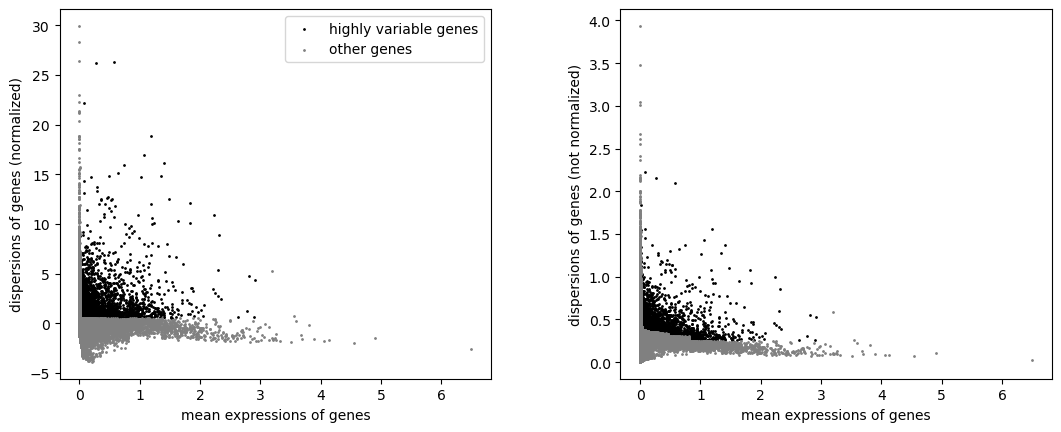

In [57]:
print('\n','Number of highly variable genes: {:d}'.format(np.sum(adata.var['highly_variable'])))
sc.pl.highly_variable_genes(adata)

In [58]:
adata.obs

,Plate ID,well,cell_id,mCherry,sample_type,sample,time,treatment,technology,sample_r,...,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,percent_mito,n_counts,percent_ribo,percent_ERCC,n_genes
A10_B002046_B001931.gencode.vM19.ERCC,B002046,A10,A10_B002046,pos,AC,C12,NA,NA,SS2,Smart-Seq AC-2,...,42.837337,56.597397,42527.0,10.657918,1.769009,NaN,2404001.0,NaN,NaN,8840
A10_B002047_B001930.gencode.vM19.ERCC,B002047,A10,A10_B002047,pos,AC,C12,NA,NA,SS2,Smart-Seq AC-2,...,40.870569,54.340666,38610.0,10.561293,0.922847,NaN,4183793.0,NaN,NaN,10705
A10_B002048_B001929.gencode.vM19.ERCC,B002048,A10,A10_B002048,pos,AC,C13,NA,NA,SS2,Smart-Seq AC-3,...,48.397282,61.831712,32109.0,10.376923,1.028534,NaN,3121822.0,NaN,NaN,10471
A10_B002049_B001928.gencode.vM19.ERCC,B002049,A10,A10_B002049,pos,AC,C13,NA,NA,SS2,Smart-Seq AC-3,...,39.100094,52.817795,23605.0,10.069256,1.084509,NaN,2176560.0,NaN,NaN,9067
A10_B002050_B001927.gencode.vM19.ERCC,B002050,A10,A10_B002050,neg,NS,S9,NA,NA,SS2,Smart-Seq NS-1,...,47.326497,63.729305,600.0,6.398595,0.157527,NaN,380886.0,NaN,NaN,7869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P7_B002048_B001929.gencode.vM19.ERCC,B002048,P7,P7_B002048,pos,AC,C13,NA,NA,SS2,Smart-Seq AC-3,...,41.765718,56.938061,33608.0,10.422549,1.988016,NaN,1690530.0,NaN,NaN,8491
P8_B002046_B001931.gencode.vM19.ERCC,B002046,P8,P8_B002046,pos,AC,C12,NA,NA,SS2,Smart-Seq AC-2,...,39.976363,54.094545,32397.0,10.385852,1.897359,NaN,1707479.0,NaN,NaN,9200
P8_B002051_B001926.gencode.vM19.ERCC,B002051,P8,P8_B002051,neg,NS,S9,NA,NA,SS2,Smart-Seq NS-1,...,54.194377,72.937540,1438.0,7.271704,0.305447,NaN,470785.0,NaN,NaN,4991
P9_B002048_B001929.gencode.vM19.ERCC,B002048,P9,P9_B002048,pos,AC,C13,NA,NA,SS2,Smart-Seq AC-3,...,99.528993,99.786485,10.0,2.397895,0.006374,NaN,156898.0,NaN,NaN,835


In [59]:
sc.pp.scale(adata, max_value=10)


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


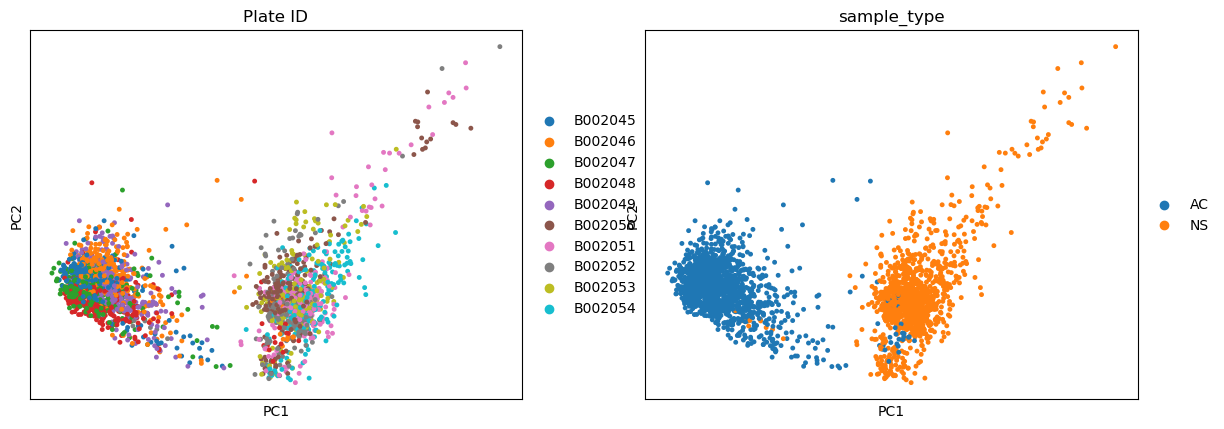

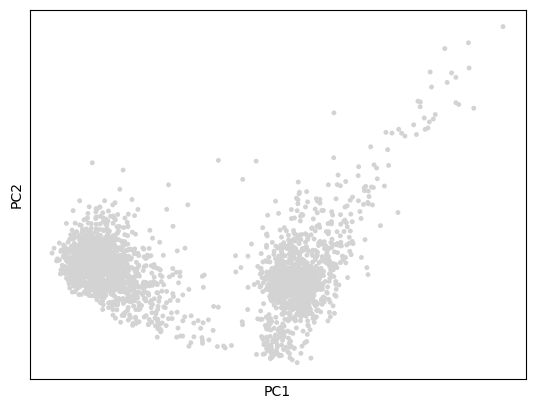

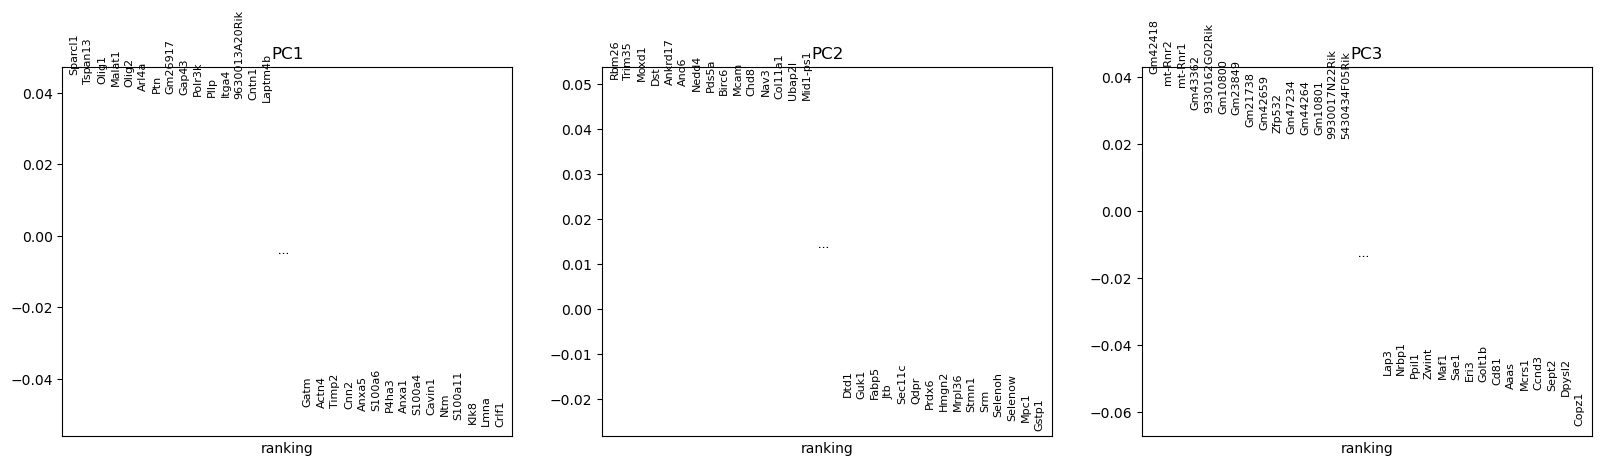

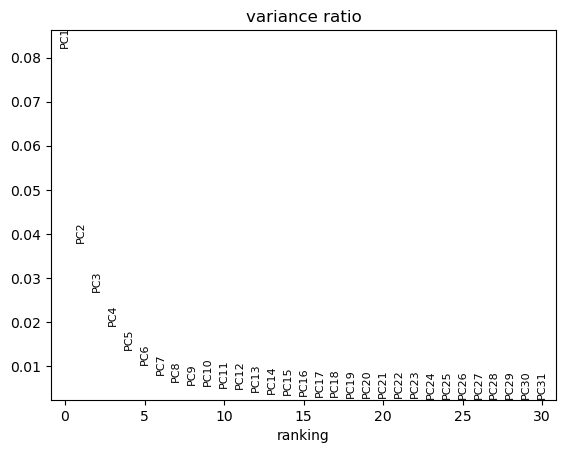

In [60]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color=['Plate ID', 'sample_type'])
sc.pl.pca_overview(adata)

In [61]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [62]:
sc.tl.umap(adata)
sc.tl.leiden(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


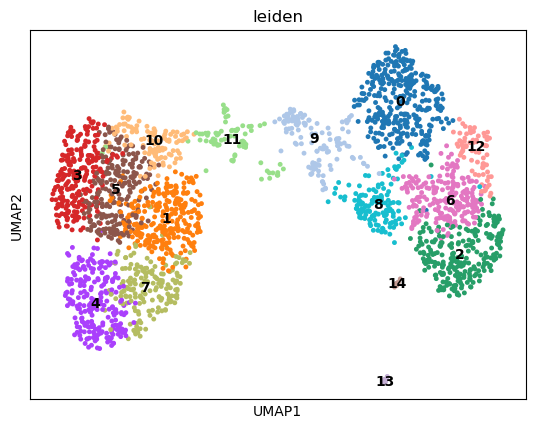

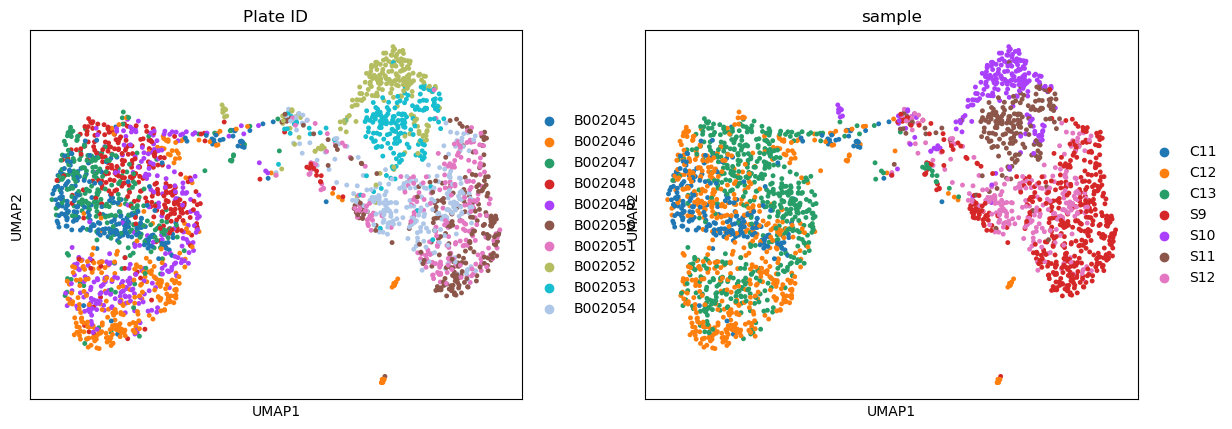

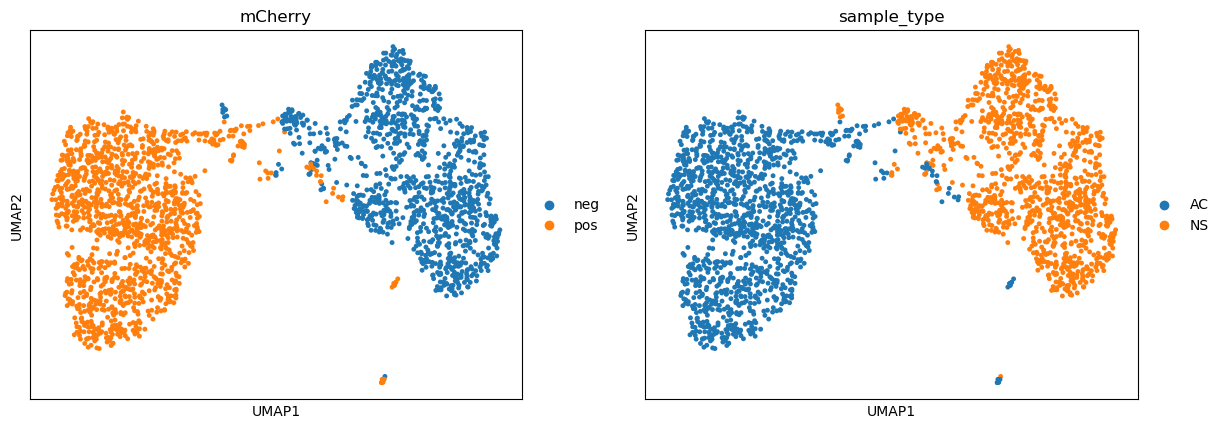

In [63]:
sc.pl.umap(adata,color=['leiden'], legend_loc='on data')
sc.pl.umap(adata,color=['Plate ID', 'sample'], palette=sc.pl.palettes.vega_20_scanpy)
sc.pl.umap(adata,color=['mCherry', 'sample_type'], palette=sc.pl.palettes.vega_20_scanpy)

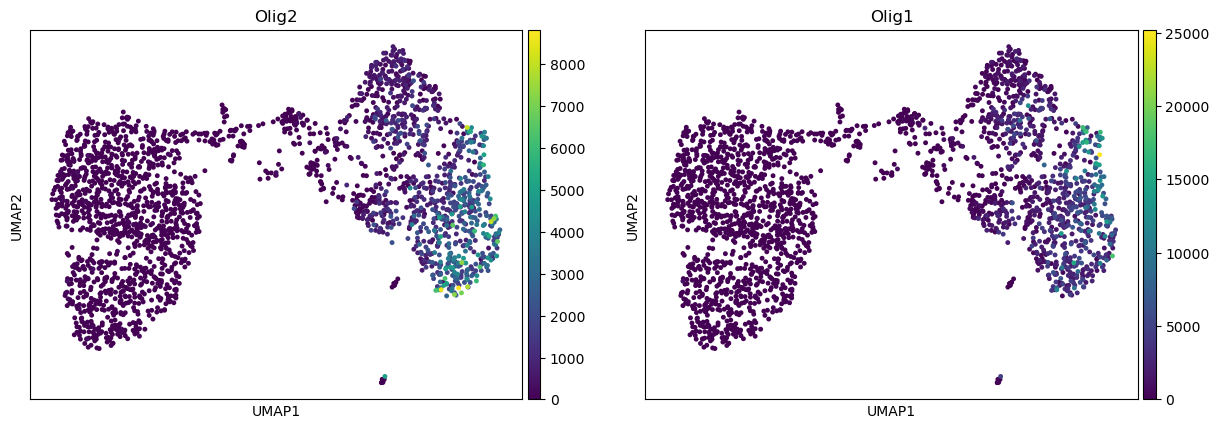

In [64]:
sc.pl.umap(adata,color=['Olig2', 'Olig1'])


In [65]:
from matplotlib.pyplot import rc_context

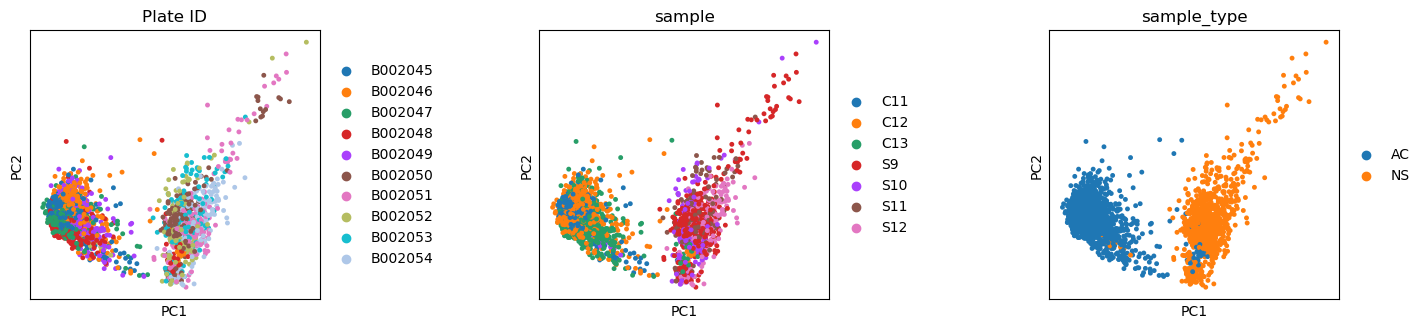

In [66]:
with rc_context({'font.size': 10.0,'figure.figsize': (3.5, 3.5)}):
    sc.pl.pca(adata, color=['Plate ID', 'sample', 'sample_type'], wspace=0.6)    


In [67]:
tab20c = sns.color_palette("tab20c").as_hex()
sample_type = [tab20c[1], tab20c[5]]


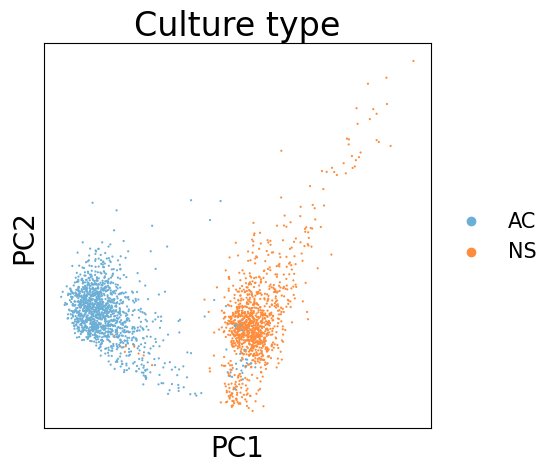

In [68]:
with rc_context({'font.size': 20.0,'figure.figsize': (5, 5)}):
    pca1 = sc.pl.pca(adata, color='sample_type', wspace=0.5, palette=sample_type, 
                    size=10, title='Culture type', frameon=True, legend_loc='right margin',
                    legend_fontsize=15, legend_fontweight='medium')

In [5]:
adata.write('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/SS2/data/SS2_processed.h5ad')

In [4]:
# load cell cycle genes
cell_cycle_genes = [x.strip() for x in open('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/pilot/multiome/cell_cycle/cell_cycle_genes.txt')]

# Define sets of genes
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

In [6]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'


/data/laura.garcia/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


    finished: added
    'S_score', score of gene set (adata.obs).
    386 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    384 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


/data/laura.garcia/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [7]:
phase = ['palevioletred','turquoise', 'silver']

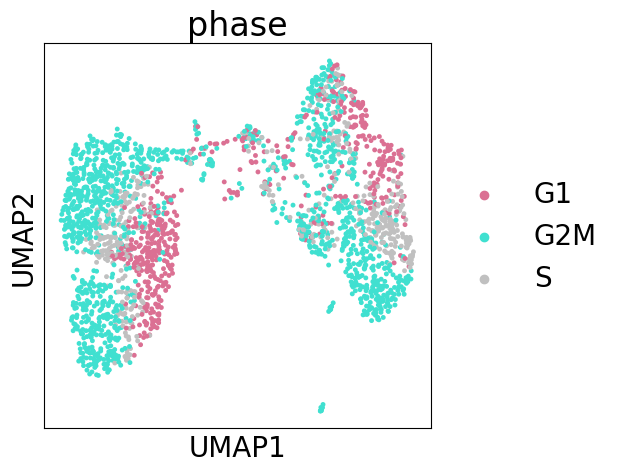

In [9]:
with rc_context({'font.size': 20.0, 'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color='phase', wspace=0.5, palette =phase)

In [10]:
adata.obs['phase'].cat.reorder_categories(['G1','S','G2M'], inplace=True)

/tmp/ipykernel_54971/1144722337.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.


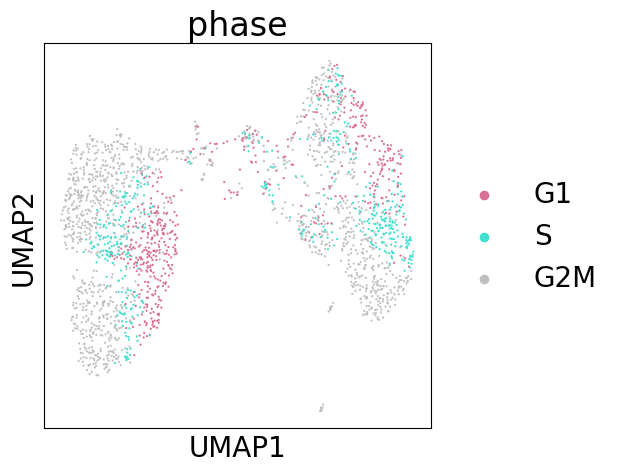

In [11]:
with rc_context({'font.size': 20.0, 'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color='phase', wspace=0.5, palette =phase, size=10)

In [22]:
total = pd.DataFrame(adata.obs['sample_type'].value_counts())
total = total.rename(columns={'sample_type':'total'})

early = adata[adata.obs['sample_type']=='AC']
early = pd.DataFrame(early.obs['phase'].value_counts())
early = early.rename(columns={'phase':'AC'})
early = early.transpose()

late = adata[adata.obs['sample_type']=='NS']
late = pd.DataFrame(late.obs['phase'].value_counts())
late = late.rename(columns={'phase':'NS'})
late = late.transpose()

df = pd.concat([early,late])
df = pd.concat([df,total], axis=1) 

percent = pd.DataFrame(df.G1.div(df.total, axis=0).mul(100).round(2))
percent.columns = ['G1 percent']
df = pd.concat([df,percent], axis=1)

percent = pd.DataFrame(df.G2M.div(df.total, axis=0).mul(100).round(2))
percent.columns = ['G2M percent']
df = pd.concat([df,percent], axis=1)

percent = pd.DataFrame(df.S.div(df.total, axis=0).mul(100).round(2))
percent.columns = ['S percent']
df = pd.concat([df,percent], axis=1)

percent = df[['G1 percent','S percent','G2M percent']]
percent = percent.rename(columns={'G1 percent':'G1','S percent':'S','G2M percent':'G2M'})

In [23]:
percent

,G1,S,G2M
AC,23.63,16.48,59.89
NS,21.78,24.59,53.63


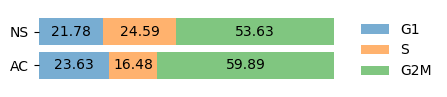

In [28]:
ax = percent.plot(kind='barh', stacked=True, figsize=(4, 1), width=0.8, alpha=0.6)

for c in ax.containers:
    # customize the label to account for cases when there might not be a bar section
    labels = [f'{w:.2f}' if (w := v.get_width()) > 0 else '' for v in c ]
    # set the bar label
    ax.bar_label(c, labels=labels, label_type='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.set_ylabel('')

ax.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False)

plt.show()

In [12]:
adata.write('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/SS2/data/SS2_processed.h5ad')

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

## Split object in samples

In [ ]:
adata = sc.read('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/SS2/data/SS2_pca.h5ad')

In [ ]:
adata

In [ ]:
def quick_sc_clustering(adata_obj, n_pcs= 50):
    print('Neighbors....')
    sc.pp.neighbors(adata_obj, 
                   metric='cosine', 
                   n_neighbors= 30 , n_pcs=n_pcs )
    print('UMAP....')
    sc.tl.umap(adata_obj, min_dist=0.3)
    print('Leiden clusters....')
    sc.tl.leiden(adata_obj)

    return adata_obj

In [ ]:
samples = set(adata.obs["sample"])

for s in samples: 
    adata_sample = adata[adata.obs["sample"] ==s].copy() 
    adata_sample = quick_sc_clustering(adata_sample)
    sample_id = adata_sample.obs["sample"][0]
    
    adata_sample.write('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/SS2/data/samples_processed/SS2_' + sample_id + '.h5ad' )

In [ ]:
sc.pp.pca(adata_sample, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata_sample)
sc.tl.umap(adata_sample)

In [ ]:
sc.pl.umap(adata_sample, color='total_counts')

In [ ]:
adata = sc.read('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/SS2/data/SS2_pca.h5ad')

In [ ]:
adata_combat = sc.read('/mnt/ibm_lg/laura.garcia/glioblastoma/analysis/SS2/data/SS2_pca.h5ad')

Batch correction


In [ ]:
sc.pp.combat(adata_combat, key='sample')